## 강서구 복지시설 데이터

In [30]:
import pandas as pd
import matplotlib as mp

In [31]:
df=pd.read_csv('../data/강서구 복지시설.csv')

In [32]:
#결측치 확인
df

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,위도,경도
0,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22,37.546865,126.833756
1,강서구립봉제산노인복지센터,A0922,(노인) 노인복지관(소규모),노인여가복지시설,자치구,서순애,1150000000,강서구,서울특별시 강서구 초록마을로15길 12,37.541782,126.851334
2,우리모두데이케어센터,A1074,(노인) 재가노인복지시설,재가노인복지시설,자치구,김기철,1150000000,강서구,서울특별시 강서구 화곡로63가길 92,37.561827,126.849771
3,한마음방문요양센터,A1153,(노인) 재가노인복지시설,재가노인복지시설,자치구,이은점,1150000000,강서구,서울특별시 강서구 초록마을로14길 44 (화곡동),37.541177,126.848068
4,참사랑재가노인지원센터,A1193,(노인) 재가노인복지시설,재가노인복지시설,자치구,조병기,1150000000,강서구,서울특별시 강서구 곰달래로 852,37.535824,126.837100
...,...,...,...,...,...,...,...,...,...,...,...
179,등촌9종합사회복지관,Z5116,(일반) 사회복지관,일반사회복지시설,자치구,김기철,1150000000,강서구,서울특별시 강서구 화곡로 63가길 92등촌9단지아파트내,37.561785,126.849782
180,방화11종합사회복지관,Z5139,(일반) 사회복지관,일반사회복지시설,자치구,김상진,1150000000,강서구,서울특별시 강서구 개화동로 21길 4sh공사 11단지아파트 내,37.569627,126.805995
181,방화2종합사회복지관,Z5140,(일반) 사회복지관,일반사회복지시설,자치구,김지연,1150000000,강서구,서울특별시 강서구 방화대로48길 40방화2종합사회복지관,37.575055,126.819588
182,방화6종합사회복지관,Z5141,(일반) 사회복지관,일반사회복지시설,자치구,김성미,1150000000,강서구,서울특별시 강서구 금낭화로23길 25-0,37.578585,126.810986


In [33]:
#결측치 없음을 확인
df.isna()

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,위도,경도
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
179,False,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,False
182,False,False,False,False,False,False,False,False,False,False,False


## 데이터 시각화

In [34]:
import folium
#서울 지도 만들기[위도,경도]
seoul_map = folium.Map(location=[37.55,126.88],zoom_start=12)
#지도 html 파일로 저장하기
seoul_map.save('./seoul.html')

In [35]:
#주소 찍기
from folium.map import Popup
import pandas as pd
import folium

df=pd.read_csv('../data/강서구 복지시설.csv')
seoul_map=folium.Map(location=[37.55800721,126.84],titles='Stamen Terrain',
                    zoom_start=14)
#위치 정보를 Marker 로 표시
#index를 시설명으로 변경하고 시설 이름이 표시되도록 함
for name, lat, lng in zip(df.시설명,df.위도,df.경도):
    iframe=folium.IFrame(name,width=100,height=80)
    popup=folium.Popup(iframe,max_width=500)
    folium.Marker([lat,lng],popup=popup).add_to(seoul_map)
    
seoul_map.save("강서구 복지시설 지도.html")

In [36]:
#노인, 아동, 장애인, 한부모 가족, 정신 보건, 일반 사회복지관, 다문화가족, 저소득, 건강가정
df['시설종류명(시설유형)'][:25]

0         (노인) 노인요양시설
1     (노인) 노인복지관(소규모)
2       (노인) 재가노인복지시설
3       (노인) 재가노인복지시설
4       (노인) 재가노인복지시설
5         (노인) 노인요양시설
6          (노인) 노인복지관
7       (노인) 재가노인복지시설
8         (노인) 노인복지주택
9       (노인) 재가노인복지시설
10        (노인) 노인요양시설
11        (노인) 노인요양시설
12        (노인) 노인복지주택
13        (노인) 노인요양시설
14      (노인) 재가노인복지시설
15          (노인) 양로시설
16    (노인) 노인복지관(소규모)
17        (노인) 노인요양시설
18    (노인) 노인요양공동생활가정
19        (노인) 노인요양시설
20      (노인) 재가노인복지시설
21        (노인) 노인요양시설
22      (노인) 재가노인복지시설
23    (노인) 노인복지관(소규모)
24    (노인) 노인복지관(소규모)
Name: 시설종류명(시설유형), dtype: object

In [37]:
df['시설종류명(시설유형)'][26:48]

26              (아동) 공동생활가정
27              (아동) 지역아동센터
28              (아동) 지역아동센터
29              (아동) 공동생활가정
30              (아동) 지역아동센터
31              (아동) 지역아동센터
32              (아동) 지역아동센터
33              (아동) 지역아동센터
34              (아동) 지역아동센터
35    (아동) 지역아동센터(지역아동복지센터)
36              (아동) 지역아동센터
37              (아동) 지역아동센터
38              (아동) 지역아동센터
39              (아동) 지역아동센터
40              (아동) 지역아동센터
41              (아동) 지역아동센터
42              (아동) 지역아동센터
43              (아동) 지역아동센터
44              (아동) 공동생활가정
45              (아동) 지역아동센터
46              (아동) 지역아동센터
47              (아동) 지역아동센터
Name: 시설종류명(시설유형), dtype: object

In [38]:
df['시설종류명(시설유형)'][48:104]

48     (장애인) 장애유형별거주시설
49        (장애인) 장애인복지관
50      (장애인) 장애인보호작업장
51        (장애인) 수화통역센터
52     (장애인) 장애인공동생활가정
53     (장애인) 장애인공동생활가정
54     (장애인) 장애인주간보호시설
55     (장애인) 장애인공동생활가정
56     (장애인) 장애인공동생활가정
57     (장애인) 장애인공동생활가정
58     (장애인) 장애인공동생활가정
59     (장애인) 장애인단기거주시설
60     (장애인) 장애인공동생활가정
61     (장애인) 장애인단기거주시설
62     (장애인) 장애인공동생활가정
63     (장애인) 장애인공동생활가정
64     (장애인) 장애인공동생활가정
65        (장애인) 장애인복지관
66      (장애인) 장애인보호작업장
67     (장애인) 장애인단기거주시설
68     (장애인) 장애인주간보호시설
69      (장애인) 장애인보호작업장
70      (장애인) 장애인보호작업장
71     (장애인) 장애인주간보호시설
72     (장애인) 장애인공동생활가정
73     (장애인) 장애인공동생활가정
74     (장애인) 장애인주간보호시설
75     (장애인) 장애유형별거주시설
76        (장애인) 장애인복지관
77     (장애인) 장애인공동생활가정
78       (장애인) 장애인체육시설
79     (장애인) 장애인주간보호시설
80     (장애인) 장애인주간보호시설
81     (장애인) 장애인공동생활가정
82      (장애인) 장애인보호작업장
83     (장애인) 장애인주간보호시설
84     (장애인) 장애인단기거주시설
85      (장애인) 장애인보호작업장
86      (장애인) 장애인보호작업장
87      (장애인) 장애인보호작업장
88     (장애인) 장애인단기거주시설
89     (장애인) 장애인주간보호시설
90     (장애인) 장애인공동생활가정
91     (장애인

In [39]:
df['시설종류명(시설유형)'][104:108]

104        (한부모가족) 미혼모자시설
105     (한부모가족) 미혼모공동생활가정
106      (한부모가족) 부자공동생활가정
107    (한부모가족) 미혼모자공동생활가정
Name: 시설종류명(시설유형), dtype: object

In [40]:
df['시설종류명(시설유형)'][108:114]

108    (정신보건) 재활훈련시설-공동생활가정
109             (정신보건) 종합시설
110    (정신보건) 재활훈련시설-공동생활가정
111    (정신보건) 재활훈련시설-공동생활가정
112    (정신보건) 재활훈련시설-공동생활가정
113    (정신보건) 재활훈련시설-주간재활시설
Name: 시설종류명(시설유형), dtype: object

## 강서구 인구 데이터

In [41]:
df_m=pd.read_excel('../data/강서구 인구.xlsx',index_col='행정기관',usecols='A,D:X')
df_m.head()

,0-4세,5-9세,10-14세,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세,...,55-59세,60-64세,65-69세,70-74세,75-79세,80-84세,84-89세,90-94세,95-99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
강서구,7806,10457,10909,11255,15174,23785,25420,23666,23120,21688,...,19016,20861,16021,11008,7606,4194,1636,478,100,19
염창동,819,1193,1187,1048,1193,1365,1566,1748,1817,1879,...,1258,1298,904,520,352,196,69,25,4,1
등촌제1동,330,265,306,392,651,1331,1646,1315,882,764,...,681,660,440,305,196,164,104,32,13,4
등촌제2동,284,344,361,491,585,917,925,799,777,672,...,719,785,561,430,253,134,48,13,3,0
등촌제3동,381,436,394,556,864,1027,1238,1109,975,868,...,1237,1458,1108,709,472,301,159,73,12,1


In [42]:
df_m.iloc[0]

0-4세        7806
5-9세       10457
10-14세     10909
15-19세     11255
20-24세     15174
25-29세     23785
30-34세     25420
35-39세     23666
40-44세     23120
45-49세     21688
50-54세     21491
55-59세     19016
60-64세     20861
65-69세     16021
70-74세     11008
75-79세      7606
80-84세      4194
84-89세      1636
90-94세       478
95-99세       100
100세 이상       19
Name: 강서구, dtype: int64

In [43]:
df_m.describe()

,0-4세,5-9세,10-14세,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세,...,55-59세,60-64세,65-69세,70-74세,75-79세,80-84세,84-89세,90-94세,95-99세,100세 이상
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.00000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,743.428571,995.904762,1038.952381,1071.904762,1445.142857,2265.238095,2420.952381,2253.904762,2201.904762,2065.52381,...,1811.047619,1986.761905,1525.809524,1048.380952,724.380952,399.428571,155.809524,45.523810,9.523810,1.809524
std,1629.335250,2195.504496,2290.521523,2353.969454,3158.734894,4963.537296,5304.673340,4928.072269,4816.692703,4523.83610,...,3954.889752,4335.741562,3329.730944,2289.637973,1581.639829,871.648930,340.382817,100.093266,20.972885,4.057327
min,126.000000,108.000000,89.000000,130.000000,266.000000,426.000000,639.000000,517.000000,409.000000,314.00000,...,515.000000,589.000000,440.000000,305.000000,196.000000,134.000000,37.000000,5.000000,1.000000,0.000000
25%,269.000000,306.000000,352.000000,370.000000,585.000000,885.000000,849.000000,815.000000,867.000000,764.00000,...,719.000000,842.000000,698.000000,444.000000,296.000000,169.000000,61.000000,17.000000,3.000000,0.000000
50%,330.000000,362.000000,395.000000,491.000000,720.000000,1176.000000,1110.000000,1064.000000,975.000000,878.00000,...,901.000000,1013.000000,761.000000,520.000000,375.000000,207.000000,81.000000,20.000000,4.000000,1.000000
75%,565.000000,966.000000,611.000000,634.000000,1075.000000,1331.000000,1566.000000,1540.000000,1588.000000,1734.00000,...,1237.000000,1298.000000,904.000000,596.000000,427.000000,242.000000,104.000000,32.000000,7.000000,1.000000
max,7806.000000,10457.000000,10909.000000,11255.000000,15174.000000,23785.000000,25420.000000,23666.000000,23120.000000,21688.00000,...,19016.000000,20861.000000,16021.000000,11008.000000,7606.000000,4194.000000,1636.000000,478.000000,100.000000,19.000000


In [44]:
df_w=pd.read_excel('../data/강서구 인구.xlsx',index_col='행정기관',usecols='A,AA:AU')
df_w.head()

,0-4세.1,5-9세.1,10-14세.1,15-19세.1,20-24세.1,25-29세.1,30-34세.1,35-39세.1,40-44세.1,45-49세.1,...,55-59세.1,60-64세.1,65-69세.1,70-74세.1,75-79세.1,80-84세.1,84-89세.1,90-94세.1,95-99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
강서구,7538,10148,10251,10897,17555,28782,25972,22489,22755,21702,...,21199,23989,18976,12440,8671,6362,3699,1594,389,68
염창동,777,1085,1131,1064,1201,1805,1926,1897,1987,1855,...,1350,1339,922,617,361,279,157,56,14,2
등촌제1동,310,291,196,350,922,2158,1978,1229,826,809,...,730,741,516,324,280,253,196,84,15,3
등촌제2동,236,307,311,350,571,981,912,767,764,740,...,869,871,710,415,278,185,115,66,17,0
등촌제3동,375,410,411,496,816,1096,1209,1031,980,1002,...,1420,1634,1309,768,620,615,427,172,44,8


In [45]:
df_m.columns

Index(['0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세',
       '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세', '65-69세',
       '70-74세', '75-79세', '80-84세', '84-89세', '90-94세', '95-99세', '100세 이상'],
      dtype='object')

In [46]:
df_w.columns

Index(['0-4세.1', '5-9세.1', '10-14세.1', '15-19세.1', '20-24세.1', '25-29세.1',
       '30-34세.1', '35-39세.1', '40-44세.1', '45-49세.1', '50-54세.1', '55-59세.1',
       '60-64세.1', '65-69세.1', '70-74세.1', '75-79세.1', '80-84세.1', '84-89세.1',
       '90-94세.1', '95-99세.1', '100세 이상.1'],
      dtype='object')

In [47]:
#컬럼명통일
df_w.columns=df_m.columns
df_w.columns

Index(['0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세',
       '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세', '65-69세',
       '70-74세', '75-79세', '80-84세', '84-89세', '90-94세', '95-99세', '100세 이상'],
      dtype='object')

## 데이터 시각화

In [48]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='AppleGothic'
matplotlib.rcParams['font.size']=10
matplotlib.rcParams['axes.unicode_minus']=False

C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tmdgh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from c

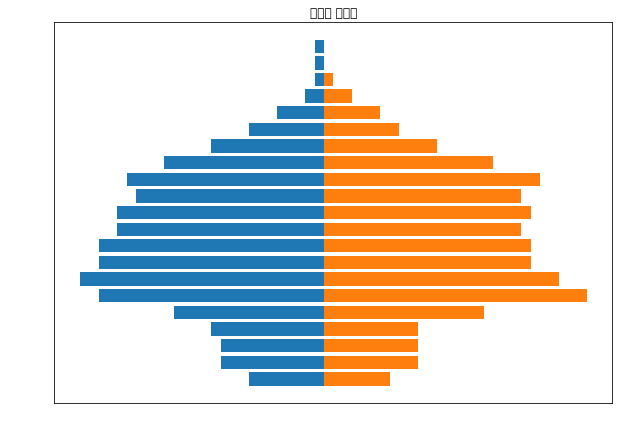

In [49]:
#강서구 남자, 여자 인구수
plt.figure(figsize=(10,7))
plt.barh(df_m.columns,-df_m.iloc[0]//1000)
plt.barh(df_w.columns,df_w.iloc[0]//1000)
plt.tick_params(color = "white", colors="white")
plt.title('강서구 인구수')
plt.show()
#남자는 30-34, 여자는 25-29세 비율이 가장 높게 나타남
#검색해본 결과 신혼부부 주거지로 인기가 많은 곳이 강서구
#강서구에 신혼희망타운 건설(2021.9) 

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :염창동


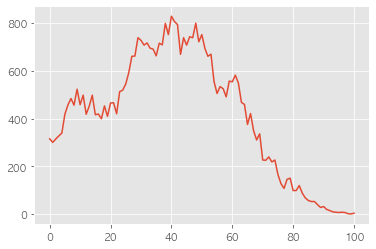

In [21]:
import csv
f=open('age.csv')
data=csv.reader(f)
result =[]
name=input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 :')
for row in data :
    if name in row [0]:
        for i in row [3:] :
            result.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(result)
plt.show()  
#여기에서도 2030의 비율이 가장 높은 것을 알 수 있다